# Some example of PCA

In [12]:
#import packages
import numpy as np
import random as rand
import sklearn
from sklearn.datasets import load_boston
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## 1. A noisy hyperplane

In [13]:
# declare global variables:
#dataset size:
N = 100
#dimension:
d = 3
#noise on the dataset:
scaling = N*N*N

In [14]:
#make the dataset:

def make_data(N,d,scaling):
    weights = rand.sample(range(N),d)
    X = [[i]*d for i in np.linspace(0,N-1,N)]
    data = [np.multiply(x,weights) for x in X]
    noise = np.random.multivariate_normal(np.zeros(d),scaling*np.eye(d),N)
    data = data+noise
    return data

In [15]:
data = make_data(N,d,scaling)

Compute the PC:

In [16]:
mean = np.mean(data, axis=0)

pca = PCA()
pca.fit(data-mean)
pca.info= {'eigenvectors':pca.components_,
    'explained_variance_ratio':pca.explained_variance_ratio_,
    'covariance matrix': pca.get_covariance
   }
data_transformed = pca.transform(data-mean)

v0,v1,v2 = pca.info['eigenvectors']*4000


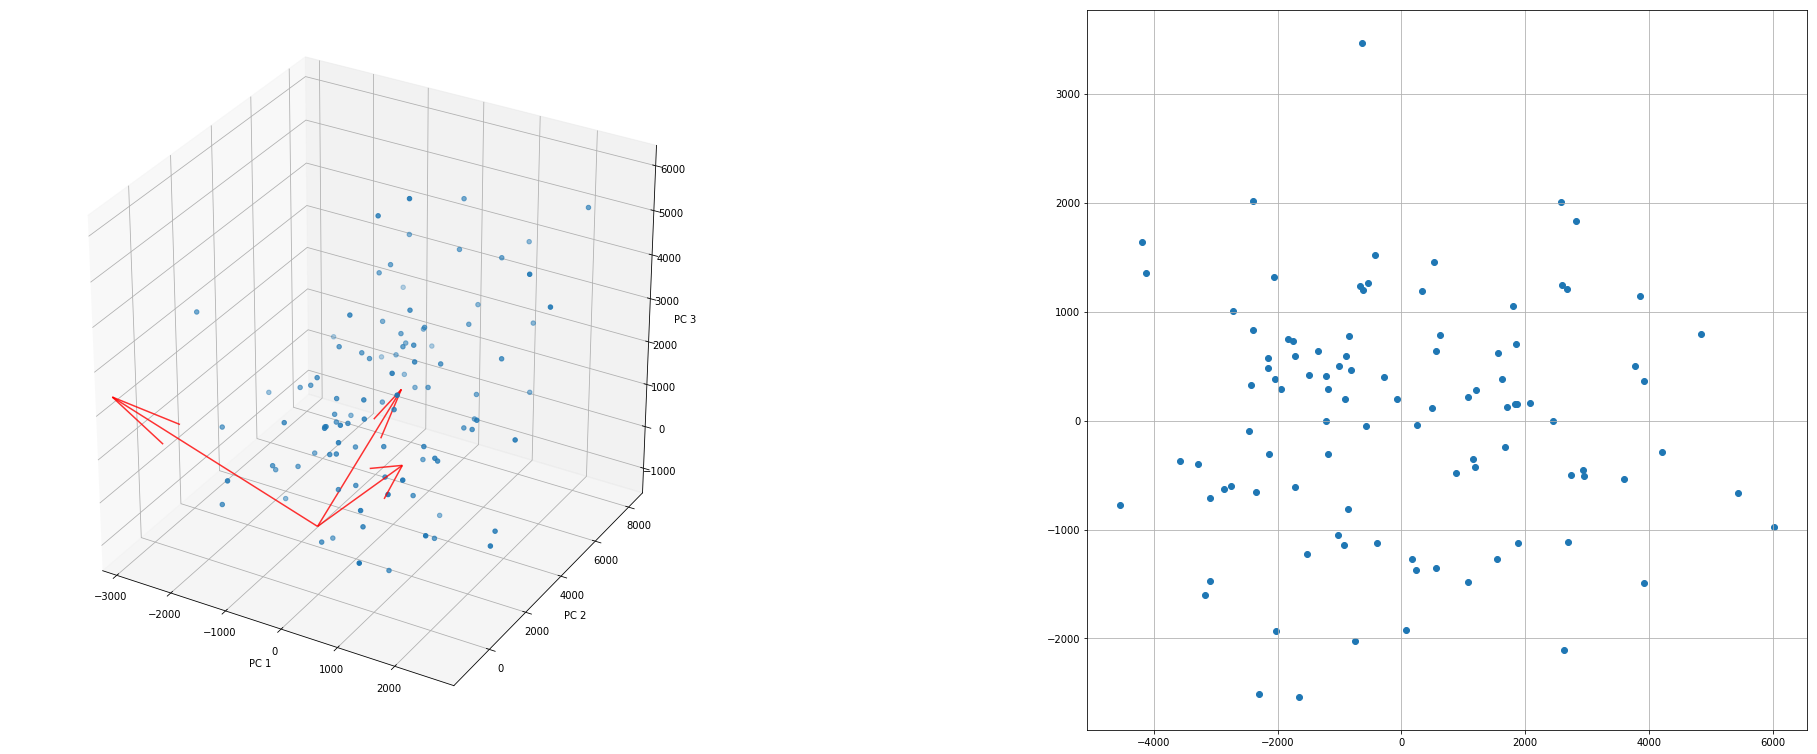

In [17]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,10))

ax1 = fig.add_axes([0, 0, 1., 1., ], projection='3d')
ax1.scatter([x[0] for x in data],[x[1] for x in data], [x[2] for x in data])
ax1.quiver(0, 0, 0,v0[0], v0[1] ,v0[2],color = 'red', alpha = .8, label = 'PC 1')
ax1.quiver(0, 0, 0, v1[0], v1[1] ,v1[2], color = 'red', alpha = .8)
ax1.quiver(0, 0, 0, v2[0], v2[1] ,v2[2], color = 'red', alpha = .8)
ax1.set_xlabel("PC 1")
ax1.set_ylabel("PC 2")
ax1.set_zlabel("PC 3")


ax2 = fig.add_axes([1.5, 0, 1., 1.])
ax2.scatter([x[0] for x in data_transformed],[x[1] for x in data_transformed])

plt.grid()

## 2. The Boston housing dataset:

In [18]:
data = load_boston()

In [19]:
print(data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## 3. Image compression

In [20]:
data = fetch_lfw_people()

ImportError: The Python Imaging Library (PIL) is required to load data from jpeg files

In [22]:
import Pillow

ModuleNotFoundError: No module named 'Pillow'